# Markowitzova teorie portfoli

## Import knihoven

Importujeme knihovny obsahující funkce potřebné k výpčtům výnosů, rizik a dalších hodnot sloužící k optimalizaci portfolia. Jedná se o námi vytvořené knihovny akcie, portfolio, tisk.
- akcie: funkce sloužící k výpočtům veličin u jednotlivých akcií
- portfolio: funkce sloužící k výpočtům veličin celého portfolia
- tisk: funkce sloužící k tisku hodnot vybraných veličin ve formě grafu do složky

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.path.dirname("demonstrace2.ipynb"), '..', 'knihovna')))
import akcie
import portfolio
import tisk

## Část druhá - Portfolio s K-aktivy

V této čísti se budeme zabývat výpočty portfolia tvořeného K-aktivy. V našem případě to znamená portoflio tvořené pěti akciemi - MTU, RWE, Porshe, PUMA, VON. Tyto akcie sledujeme v období 500 dnů, přičemž jeden obchodní měsíc má 20 dní. Výpočty budeme provádět s datovou historií jednoho roku (240 dní) a použijeme pasivní investiční strategii, tzn. investor bude měnit vklady každé ři měsíce. 

### Načítání dat ze souboru

Nejprve musíme načíst data o akciích - MTU a RWE. Soubory obsahují data a ceny akcií v jentolivých dnech. Do proměnné data1 nahrajeme ceny akcie MTU, do proměnné data2 nahrajeme ceny akcie RWE, do proměnné data3 nahrajeme ceny akcie Porshe, do proměnné data4 nahrajeme ceny akcie PUMA a do proměnné data5 nahrajeme ceny akcie VON.

In [2]:
data1 = akcie.nacist_data("/home/iris/Projekt/testovaci_data/mtu.txt")
data2 = akcie.nacist_data("/home/iris/Projekt/testovaci_data/rwe.txt")
data3 = akcie.nacist_data("/home/iris/Projekt/testovaci_data/porshe.txt")
data4 = akcie.nacist_data("/home/iris/Projekt/testovaci_data/puma.txt")
data5 = akcie.nacist_data("/home/iris/Projekt/testovaci_data/von.txt")

### Tisk dat

Pro ilustraci data vytiskneme na standartní výstup. Tyto data budou potřeba k dalším výpočtům. Dále si je však zobrazovat nepotřebujeme.

In [3]:
print(data1)

[242.6  243.   241.7  238.8  239.4  238.   237.   233.6  237.6  237.
 240.5  243.5  239.1  239.8  235.2  239.7  237.8  239.8  241.6  240.4
 240.   241.   241.7  241.   246.7  242.5  238.3  238.1  241.7  244.5
 243.4  244.2  245.5  240.4  248.1  251.5  258.1  260.3  264.8  261.7
 261.4  252.7  247.3  251.4  249.9  249.1  252.8  257.   257.8  258.9
 255.1  258.3  258.2  258.3  262.2  264.5  270.6  270.3  270.4  271.5
 277.4  281.6  286.4  283.3  285.3  284.9  284.3  286.   279.1  277.9
 282.4  278.5  273.7  276.   277.7  269.6  272.6  274.6  276.   278.9
 275.7  275.3  281.   275.2  275.4  276.7  265.2  258.4  246.   235.2
 233.4  230.3  221.7  212.7  214.7  217.7  211.6  204.   182.7  190.25
 180.8  163.6  156.5  133.55 129.05 106.4  130.95 133.   116.95 118.1
 134.9  149.3  145.7  135.6  132.   120.4  113.85 106.3  119.25 126.
 124.4  131.25 126.   117.7  112.4  118.3  119.4  111.8  111.3  112.
 109.5  111.15 115.4  125.95 124.05 114.25 124.6  124.75 126.75 124.25
 121.   123.65 117.1 

In [4]:
print(data2)

[27.39 27.28 27.36 27.12 27.58 27.9  28.1  27.57 27.35 26.76 27.18 27.3
 27.72 27.57 26.77 26.85 25.94 26.23 25.92 26.33 26.42 25.72 25.73 26.64
 26.48 26.33 26.42 26.42 26.9  26.95 27.14 27.   27.17 25.48 25.76 25.83
 25.75 26.16 26.11 26.12 26.55 26.4  25.98 26.35 26.46 26.14 26.56 27.04
 26.94 27.02 27.29 27.02 26.81 26.56 27.05 27.21 27.47 29.12 29.35 29.18
 29.44 30.06 30.95 31.34 31.15 31.22 31.25 31.71 31.65 31.64 31.81 31.76
 31.11 31.54 31.56 31.48 32.17 32.44 32.56 33.06 32.48 32.93 33.38 33.52
 34.1  34.4  34.2  34.4  33.18 31.99 32.14 32.42 30.75 32.7  32.92 34.36
 33.08 31.17 27.81 28.05 27.6  23.57 23.91 21.43 23.6  21.99 22.61 21.26
 21.39 22.59 23.91 24.04 23.3  23.09 23.82 22.41 23.24 22.92 23.5  24.15
 24.7  25.72 25.62 24.95 25.1  25.22 25.   23.52 24.46 24.72 25.12 26.11
 25.86 26.43 26.17 25.62 26.55 26.56 26.79 27.13 27.03 27.19 27.01 27.24
 27.5  28.73 28.31 28.79 28.93 29.18 29.92 29.9  29.49 30.15 29.93 30.44
 31.62 31.19 30.41 30.84 29.75 30.78 29.25 29.6  29.

In [5]:
print(data3)

[ 64.5   64.54  64.8   65.4   65.5   65.64  66.14  65.9   67.58  67.18
  67.04  66.68  66.    68.52  68.48  68.4   69.98  68.9   68.7   69.04
  69.    68.7   69.38  66.92  67.56  67.04  67.08  67.42  68.    67.7
  68.22  67.88  67.3   66.98  66.8   67.1   67.08  67.62  67.1   66.12
  66.78  67.72  68.9   68.56  68.2   67.98  67.26  67.38  67.14  67.46
  66.46  67.86  67.02  66.34  67.5   67.28  68.7   69.36  69.54  69.4
  68.12  67.58  67.6   68.12  67.56  67.24  66.74  66.48  64.54  64.08
  63.48  61.86  60.86  61.5   63.3   64.14  64.5   63.5   62.66  63.52
  65.26  66.    65.18  65.44  64.38  65.08  65.36  63.    59.56  58.34
  58.7   57.04  57.1   56.8   56.94  58.4   55.    54.5   50.16  49.9
  48.3   41.5   41.45  36.99  36.49  30.99  30.5   33.8   33.38  37.8
  40.2   40.97  39.5   37.27  38.2   37.46  36.97  35.67  40.26  42.18
  42.85  44.68  45.29  42.4   41.85  43.83  43.74  41.25  41.73  42.94
  42.6   43.52  44.87  48.    46.16  44.11  45.55  45.56  46.14  46.96
  46.59  4

In [6]:
print(data4)

[ 72.35  72.35  70.9   70.65  71.9   70.4   67.55  66.05  66.8   66.4
  67.7   67.75  67.8   68.05  66.9   66.05  67.7   66.5   66.75  66.35
  66.8   66.7   66.75  67.55  67.25  67.15  67.5   66.75  68.05  68.9
  70.4   69.5   68.55  67.25  67.45  68.65  67.7   67.7   66.65  66.7
  67.25  66.85  66.55  66.4   67.35  67.1   67.    68.7   68.55  68.8
  68.35  67.55  68.    70.    71.6   72.45  72.7   72.2   73.5   75.9
  76.05  76.6   76.05  76.3   77.25  78.65  77.6   78.2   75.5   75.65
  74.45  73.5   71.95  71.65  74.9   73.35  71.9   70.65  71.1   70.45
  72.5   72.    72.05  72.5   71.95  79.95  80.5   79.05  74.75  73.
  74.5   70.25  69.25  68.55  69.55  71.    67.05  64.35  59.    60.4
  55.4   48.5   49.26  49.86  48.7   41.5   43.7   47.42  44.54  49.
  57.4   57.    56.05  54.4   54.15  52.1   51.62  48.26  50.86  53.44
  53.7   58.34  59.5   56.58  54.92  57.68  57.02  54.4   54.1   54.02
  53.14  55.12  55.04  58.02  57.2   54.    54.94  55.    59.36  60.12
  58.48  59.3   

In [7]:
print(data5)

[47.78 48.15 48.08 47.48 48.01 47.91 46.99 47.19 46.73 47.05 47.69 47.95
 47.53 47.96 47.05 47.52 46.78 46.33 46.07 46.15 46.69 46.99 46.96 47.77
 47.88 47.41 47.08 47.08 47.11 47.72 47.94 47.52 47.33 46.24 46.79 46.24
 45.81 46.46 46.5  46.88 46.95 46.93 46.3  46.56 46.62 46.83 46.88 47.51
 47.64 48.1  47.9  48.15 48.52 48.49 48.64 48.95 49.16 48.99 49.18 49.27
 49.45 49.97 50.18 50.4  50.52 50.66 50.64 51.1  50.78 50.94 51.78 51.64
 51.5  51.76 51.84 51.88 52.14 52.32 52.88 52.84 52.5  52.5  53.1  53.1
 53.68 54.08 53.5  53.6  52.98 51.38 51.72 50.54 48.13 49.56 50.06 53.14
 53.02 51.38 48.49 47.38 45.81 43.09 42.7  38.7  40.72 38.2  40.99 42.
 41.52 44.1  44.96 43.39 43.02 44.94 44.81 44.08 44.75 44.66 45.   44.75
 45.2  45.46 45.5  45.51 45.14 45.34 45.27 44.45 44.79 44.   44.56 44.59
 44.16 44.3  44.87 44.13 47.03 47.19 48.69 48.56 49.32 48.89 48.11 47.92
 47.54 48.55 49.12 49.19 48.95 49.62 51.2  50.98 50.1  51.96 51.76 52.44
 52.66 55.   54.64 53.92 52.98 53.82 52.48 52.9  53.52

### Výpočty hodnot a rizik u jednotlivých akcií
Výpočet denních výnosů ($dv$), druhých mocnin denních výnosů ($dm$), měsíčních středních výnosů ($mv$), měsíčních středních rizik ($mr$), středních výnosů ($stv$) a středních rizik ($str$) jednotlivých akcií.

- Denní výnosy:

Pro každý jeden den kromě nultého vypočítáme výnos akcie.

$dv[i] = \frac{data1[i]-data1[i-1]}{data1[i-1]}$, pro $i = 1, ..., len(data1)$

- Druhé mocniny denních výnosů:

Pomocná proměnná potřebná pro jiné výpočty.

$dm[i] = (dv[i])^2$, pro $i = 1, ..., len(data1)$

- Střední výnosy:

Výpočet středního výnosu akcie za dané období z historických dat. V našem případě musíme tento výpočet provést 5x. 

$stv = \frac{1}{len(data1)}\sum_{i=1}^{len(data1)} dv[i]$

- Střední rizika:

Výpočet středního rizika akcie za dané období z historických dat. V našem případě musíme tento výpočet provést 5x.

$str = \sqrt{\frac{1}{len(data1)-1}\sum_{i=1}^{len(data1)} (dv[i])^2 - \frac{1}{len(data1)(len(data1)-1)}(\sum_{i=1}^{len(data1)} dv[i])^2}$

- Měsíční střední výnosy:

Plyne z výpočtu středního výnosu. 

$mv = 20stv$

- Měsíční střední rizika:

Plyne z výpočtu středního rizika.

$mr = \sqrt{20}str$

In [8]:
dv1, dm1, mv1, mr1, stv1, str1 = akcie.investicni_strategie(data1, 240, 60)
dv2, dm2, mv2, mr2, stv2, str2 = akcie.investicni_strategie(data2, 240, 60)
dv3, dm3, mv3, mr3, stv3, str3 = akcie.investicni_strategie(data3, 240, 60)
dv4, dm4, mv4, mr4, stv4, str4 = akcie.investicni_strategie(data4, 240, 60)
dv5, dm5, mv5, mr5, stv5, str5 = akcie.investicni_strategie(data5, 240, 60)

Pro ilustraci provedeme tisk na standartním výstupu.

In [9]:
print(dv1)
print(dv2)
print(dv3)
print(dv4)
print(dv5)

[[ 0.0016488   0.01514059  0.05506431 -0.02032121  0.01589544]
 [-0.00534979  0.01704545 -0.04       -0.01037136  0.00104312]
 [-0.01199835 -0.01082402 -0.06587302  0.03144016 -0.01667246]
 ...
 [-0.0118322  -0.01111648  0.00481928 -0.00619933  0.0035962 ]
 [-0.01161103  0.          0.00863309  0.01535509 -0.01151779]
 [ 0.04111601  0.00097752 -0.04374703  0.02079395 -0.00906266]]
[[-0.00401606  0.02105978  0.04129555  0.01255493  0.00407651]
 [ 0.00293255  0.02960745 -0.00388802 -0.0049597   0.01998751]
 [-0.00877193  0.01260097 -0.02615144  0.00093458  0.02510716]
 ...
 [ 0.01092896  0.00088994 -0.02876585  0.00808538  0.00089982]
 [-0.00413355 -0.00474215  0.         -0.00288739 -0.01947857]
 [ 0.00127714 -0.02352591  0.01305732  0.01608752 -0.00152812]]
[[ 0.00062016 -0.00792719  0.04270712 -0.02334337  0.0086512 ]
 [ 0.00402851  0.00029595  0.01365264  0.00231303 -0.00350877]
 [ 0.00925926  0.00769231 -0.063811    0.03846154 -0.01799687]
 ...
 [ 0.00180252  0.00241546  0.06917476 

In [10]:
print(dm1)
print(dm2)
print(dm3)
print(dm4)
print(dm5)

[[2.71855666e-06 2.29237502e-04 3.03207809e-03 4.12951420e-04
  2.52665118e-04]
 [2.86202984e-05 2.90547521e-04 1.60000000e-03 1.07565143e-04
  1.08808982e-06]
 [1.43960284e-04 1.17159460e-04 4.33925422e-03 9.88483804e-04
  2.77970780e-04]
 ...
 [1.40000908e-04 1.23576159e-04 2.32254318e-05 3.84317220e-05
  1.29326422e-05]
 [1.34816029e-04 0.00000000e+00 7.45303038e-05 2.35778678e-04
  1.32659454e-04]
 [1.69052594e-03 9.55539694e-07 1.91380246e-03 4.32388392e-04
  8.21318395e-05]]
[[1.61287721e-05 4.43514444e-04 1.70532217e-03 1.57626212e-04
  1.66179583e-05]
 [8.59985724e-06 8.76601200e-04 1.51167375e-05 2.45986481e-05
  3.99500468e-04]
 [7.69467528e-05 1.58784427e-04 6.83898033e-04 8.73438728e-07
  6.30369721e-04]
 ...
 [1.19442205e-04 7.91999677e-07 8.27474250e-04 6.53733961e-05
  8.09676097e-07]
 [1.70861968e-05 2.24879470e-05 0.00000000e+00 8.33703096e-06
  3.79414828e-04]
 [1.63108456e-06 5.53468360e-04 1.70493732e-04 2.58808174e-04
  2.33514266e-06]]
[[3.84592272e-07 6.28402988e

In [11]:
print(mv1)
print(mv2)
print(mv3)
print(mv4)
print(mv5)

[-0.02801727 -0.00646303  0.05038232  0.03519636  0.03057949]
[0.01807443 0.01573335 0.02432623 0.00180983 0.0044298 ]
[-0.00944887 -0.00550408  0.06870185  0.05218289  0.04758213]
[0.01570637 0.02157364 0.04591002 0.02843316 0.02910147]
[ 0.01965399  0.01591896  0.01952494 -0.00042446 -0.00601918]


In [12]:
print(mr1)
print(mr2)
print(mr3)
print(mr4)
print(mr5)

[0.18382138 0.19547308 0.14583911 0.11278881 0.10576352]
[0.11543707 0.11507879 0.08070906 0.07146207 0.06964492]
[0.13793916 0.14247059 0.10972508 0.0989653  0.09664071]
[0.13900605 0.14245359 0.09723538 0.08049122 0.07626888]
[0.08370666 0.08909944 0.06676384 0.06121847 0.05777663]


In [13]:
print(stv1)
print(stv2)
print(stv3)
print(stv4)
print(stv5)

[-0.00140086 -0.00032315  0.00251912  0.00175982  0.00152897]
[9.03721731e-04 7.86667518e-04 1.21631141e-03 9.04915796e-05
 2.21490088e-04]
[-0.00047244 -0.0002752   0.00343509  0.00260914  0.00237911]
[0.00078532 0.00107868 0.0022955  0.00142166 0.00145507]
[ 9.82699496e-04  7.95947952e-04  9.76247092e-04 -2.12231849e-05
 -3.00958986e-04]


In [14]:
print(str1)
print(str2)
print(str3)
print(str4)
print(str5)

[0.04110371 0.04370911 0.03261062 0.02522034 0.02364944]
[0.02581251 0.0257324  0.01804709 0.01597941 0.01557308]
[0.03084413 0.03185739 0.02453527 0.02212931 0.02160952]
[0.0310827  0.03185359 0.02174249 0.01799838 0.01705424]
[0.01871738 0.01992324 0.01492885 0.01368887 0.01291925]


### Výpočet kovariance

Kovariance popisuje vztah mezi dvěma aktivy- Mimo to jej potřebujeme k výpočtu rizika portfolia. Kovarianci musíme spočítat pro každé dvě akcie zvlášť. Z těchto dat po té vytvoříme list, z kterého budeme tvořit matice kovariancií. Vzorec pro výpočet kovariance vypadá takto:

$kov11 = \frac{1}{len(data1)-1}\sum_{i=1}^{len(data1)}dv1[i]dv2[i]-\frac{1}{len(data1)(len(data1)-1)} \sum_{i=1}^{len(data1)}dv1[i] \sum_{i=1}^{len(data1)} dv2[i]$

In [15]:
kov11 = portfolio.kovariance(data1, data1, 240, 60)
kov12 = portfolio.kovariance(data1, data2, 240, 60)
kov13 = portfolio.kovariance(data1, data3, 240, 60)
kov14 = portfolio.kovariance(data1, data4, 240, 60)
kov15 = portfolio.kovariance(data1, data5, 240, 60)
kov21 = portfolio.kovariance(data2, data1, 240, 60)
kov22 = portfolio.kovariance(data2, data2, 240, 60)
kov23 = portfolio.kovariance(data2, data3, 240, 60)
kov24 = portfolio.kovariance(data2, data4, 240, 60)
kov25 = portfolio.kovariance(data2, data5, 240, 60)
kov31 = portfolio.kovariance(data3, data1, 240, 60)
kov32 = portfolio.kovariance(data3, data2, 240, 60)
kov33 = portfolio.kovariance(data3, data3, 240, 60)
kov34 = portfolio.kovariance(data3, data4, 240, 60)
kov35 = portfolio.kovariance(data3, data5, 240, 60)
kov41 = portfolio.kovariance(data4, data1, 240, 60)
kov42 = portfolio.kovariance(data4, data2, 240, 60)
kov43 = portfolio.kovariance(data4, data3, 240, 60)
kov44 = portfolio.kovariance(data4, data4, 240, 60)
kov45 = portfolio.kovariance(data4, data5, 240, 60)
kov51 = portfolio.kovariance(data5, data1, 240, 60)
kov52 = portfolio.kovariance(data5, data2, 240, 60)
kov53 = portfolio.kovariance(data5, data3, 240, 60)
kov54 = portfolio.kovariance(data5, data4, 240, 60)
kov55 = portfolio.kovariance(data5, data5, 240, 60)
a = [kov11, kov12, kov13, kov14, kov15, kov21, kov22, kov23, kov24, kov25, kov31, kov32, kov33, kov34, kov35, kov41, kov42, kov43, kov44, kov45, kov51, kov52, kov53, kov54, kov55]
print(a)
print(len(a))

[array([0.00169178, 0.00191347, 0.00106421, 0.00063625, 0.00055941]), array([5.11683370e-04, 4.92806747e-04, 1.53070566e-04, 2.31096917e-05,
       2.79407640e-05]), array([0.00080211, 0.00090007, 0.00043874, 0.00018042, 0.00017572]), array([7.67915722e-04, 8.03040236e-04, 2.86100444e-04, 9.75510683e-05,
       8.44069863e-05]), array([ 3.59920705e-04,  3.05614946e-04,  7.08403293e-05, -6.32268759e-06,
       -1.89431596e-05]), array([5.11683370e-04, 4.92806747e-04, 1.53070566e-04, 2.31096917e-05,
       2.79407640e-05]), array([0.0006665 , 0.00066236, 0.00032569, 0.00025532, 0.00024249]), array([3.94511478e-04, 4.16935162e-04, 1.26224757e-04, 3.82870512e-05,
       2.72558928e-05]), array([3.89567044e-04, 4.13155625e-04, 1.79069620e-04, 9.87417906e-05,
       8.75777260e-05]), array([3.07758748e-04, 3.28089833e-04, 1.18487546e-04, 9.14945110e-05,
       7.40354973e-05]), array([0.00080211, 0.00090007, 0.00043874, 0.00018042, 0.00017572]), array([3.94511478e-04, 4.16935162e-04, 1.26224

### Tvorba matice

Z jednotlivých kovariancí vytvoříme matici ve tvaru:

\begin{pmatrix}
  kov11  & kov12 & kov13 & kov14 & kov15\\

  kov21 & kov22 & kov23 & kov24 & kov25\\

  kov31 & kov32 & kov33 & kov34 & kov35\\

  kov41 & kov42 & kov43 & kov44 & kov45\\

  kov51 & kov52 & kov53 & kov54 & kov55\\

\end{pmatrix}

In [16]:
matice = portfolio.tvorba_matice(a, 240, 60)
print(matice)

[array([[0.00169178, 0.00051168, 0.00080211, 0.00076792, 0.00035992],
       [0.00051168, 0.0006665 , 0.00039451, 0.00038957, 0.00030776],
       [0.00080211, 0.00039451, 0.00095193, 0.00064443, 0.00024555],
       [0.00076792, 0.00038957, 0.00064443, 0.00096673, 0.00026515],
       [0.00035992, 0.00030776, 0.00024555, 0.00026515, 0.00035034]]), array([[0.00191347, 0.00049281, 0.00090007, 0.00080304, 0.00030561],
       [0.00049281, 0.00066236, 0.00041694, 0.00041316, 0.00032809],
       [0.00090007, 0.00041694, 0.00101557, 0.00067608, 0.00025109],
       [0.00080304, 0.00041316, 0.00067608, 0.00101532, 0.00026836],
       [0.00030561, 0.00032809, 0.00025109, 0.00026836, 0.00039695]]), array([[1.06421011e-03, 1.53070566e-04, 4.38737643e-04, 2.86100444e-04,
        7.08403293e-05],
       [1.53070566e-04, 3.25689739e-04, 1.26224757e-04, 1.79069620e-04,
        1.18487546e-04],
       [4.38737643e-04, 1.26224757e-04, 6.02131094e-04, 2.11373436e-04,
        7.22250401e-05],
       [2.8610

Funkce vytvoří matici ve tvaru:

\begin{pmatrix}
  2kov11  & 2kov12 & 2kov13 & 2kov14 & 2kov15 & 1\\

  2kov21 & 2kov22 & 2kov23 & 2kov24 & 2kov25 & 1\\

  2kov31 & 2kov32 & 2kov33 & 2kov34 & 2kov35 & 1\\

  2kov41 & 2kov42 & 2kov43 & 2kov44 & 2kov45 & 1\\

  2kov51 & 2kov52 & 2kov53 & 2kov54 & 2kov55 & 1\\

  1 & 1 & 1 & 1 & 1 & 0 \\

\end{pmatrix}

In [17]:
matice_kov = portfolio.kovariancni_matice(matice, 240, 60)
print(matice_kov)

[array([[3.38355597e-03, 1.02336674e-03, 1.60422992e-03, 1.53583144e-03,
        7.19841410e-04, 1.00000000e+00],
       [1.02336674e-03, 1.33299253e-03, 7.89022955e-04, 7.79134089e-04,
        6.15517496e-04, 1.00000000e+00],
       [1.60422992e-03, 7.89022955e-04, 1.90386368e-03, 1.28885580e-03,
        4.91099983e-04, 1.00000000e+00],
       [1.53583144e-03, 7.79134089e-04, 1.28885580e-03, 1.93345711e-03,
        5.30297310e-04, 1.00000000e+00],
       [7.19841410e-04, 6.15517496e-04, 4.91099983e-04, 5.30297310e-04,
        7.00680737e-04, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 0.00000000e+00]]), array([[3.82693766e-03, 9.85613494e-04, 1.80013408e-03, 1.60608047e-03,
        6.11229891e-04, 1.00000000e+00],
       [9.85613494e-04, 1.32472539e-03, 8.33870324e-04, 8.26311250e-04,
        6.56179665e-04, 1.00000000e+00],
       [1.80013408e-03, 8.33870324e-04, 2.03113474e-03, 1.35216654e-03,
        5.02176133e-0

Vytvoří inverzi předešlé matice.

In [18]:
mat_inv = portfolio.inverze(matice_kov)
print(mat_inv)

[array([[ 5.61084505e+02, -7.60896006e+01, -2.53034754e+02,
        -1.79881974e+02, -5.20781762e+01, -1.00910916e-01],
       [-7.60896006e+01,  1.43680059e+03, -2.12428544e+02,
        -1.26579461e+02, -1.02170298e+03,  5.77325464e-02],
       [-2.53034754e+02, -2.12428544e+02,  1.13079930e+03,
        -4.92031783e+02, -1.73304222e+02,  1.39916922e-01],
       [-1.79881974e+02, -1.26579461e+02, -4.92031783e+02,
         1.07786275e+03, -2.79369532e+02,  7.31962997e-02],
       [-5.20781762e+01, -1.02170298e+03, -1.73304222e+02,
        -2.79369532e+02,  1.52645491e+03,  8.30065148e-01],
       [-1.00910916e-01,  5.77325464e-02,  1.39916922e-01,
         7.31962997e-02,  8.30065148e-01, -6.52035195e-04]]), array([[ 4.83335295e+02, -6.09671938e+01, -2.86328432e+02,
        -1.49666881e+02,  1.36272113e+01, -4.21266888e-02],
       [-6.09671938e+01,  1.50790204e+03, -2.30601898e+02,
        -1.78577867e+02, -1.03775508e+03,  8.33407372e-02],
       [-2.86328432e+02, -2.30601898e+02,  1.

Hodnoty c jsou hodnoty posledního řádku matice mat_inv kromě posledního prvku. Pří hledání minimálního rizika portfolia a jemu příslušnému výnosu platí, že váhy portfolia jsou rovny hodnotám c.

In [19]:
c = portfolio.c(mat_inv, 240, 60)
print(c)

[array([-0.10091092,  0.05773255,  0.13991692,  0.0731963 ,  0.83006515]), array([-0.04212669,  0.08334074,  0.12629894,  0.07680122,  0.75568579]), array([0.0139345 , 0.20660086, 0.12604659, 0.09509663, 0.55832141]), array([0.11847856, 0.19786038, 0.10777648, 0.14813346, 0.42775112]), array([0.12613484, 0.18002151, 0.09369639, 0.15007064, 0.45007662])]


### Optimální portfolio - minimalizace rizika a jemu daný výnos

Vypočítáme výnos portfolia při minimálním riziku, využijeme vzorec:

$optvynos =  \sum_{i=1}^{pocetakcii} mv_{i}$

In [20]:
optvynos = portfolio.optimalizace_vynos([mv1, mv2, mv3, mv4, mv5], c)
print(optvynos)

[0.02001241 0.01457495 0.02965459 0.01418253 0.01077106]


Vypočítáme minimální riziko portfolia, využijeme vzorec:

$optriziko = \sum_{i=1}^{pocetakcii}\sum_{j=1}^{pocetakcii} c[i] c[j] kov_{ij}$

In [21]:
optriziko = portfolio.optimalizace_riziko(matice, c)
print(optriziko)

[0.00013712 0.00014397 0.00018901 0.00024277 0.00023901]


Proměnné d a di jsou pomocné proměnné, nedávají nám žádné podstatné informace o našem portfoliu. Jsou ale potřebné k dalším výpočtům.

- di:

$di=\sum_{j=1}^{pocetakcii} a_{ij} mv_j$, kde $a_{ij}$ je prvek mat_inv kromě posledního řádku a sloupce.

- d:

$d=\sum_{i=1}^{pocetakcii}\sum_{j=1}^{pocetakcii} a_{ij} mv_{i} mv_{j}$

In [22]:
d = portfolio.d(mat_inv, [mv1, mv2, mv3, mv4, mv5])
print(d)

[1.33780111 0.65134806 2.06682664 2.9761503  3.2925946 ]


In [23]:
di = portfolio.di(mat_inv, [mv1, mv2, mv3, mv4, mv5])
print(di)

[array([-18.55327468,   8.03974766, -18.56911275,  18.83967675,
        10.24296301]), array([ -5.51898432,   5.01508076, -19.80532903,  18.47366047,
         1.83557212]), array([ -5.97672385, -18.33201629,  38.31830344,  17.24058325,
       -31.25014654]), array([  0.86563537, -25.439892  ,  40.85381305,  29.55701141,
       -45.83656783]), array([ -2.38475749, -11.04232765,  41.04077252,  36.88472287,
       -64.49841025])]


### Portfolio s daným výnosem 7%

Při výpočtu portfolia s danným výnosem, v našem případě investor poždaduje výnos 7%, musíme spočítat parametr, který nám poté pomůže při výpočtu vah portfolia, a poté samontého rizika při daném výnosu.

$parvyn=\frac{0.07-optvynos}{d}$

In [24]:
par_vyn = portfolio.par_vynos(optvynos, d, 0.07)
print(par_vyn)

[-0.03736548 -0.08509283 -0.01952046 -0.01875492 -0.01798853]


V předešlé buňce jsme se věnovali výpočtu parametru, nyní můžeme tento parametr využítpři výpočtu vah a rizika.

- Váhy:

$w[i]=c_i + parvyn * di$

- Riziko:

$riziko=\sum_{i=1}^{pocetakcii} w_i^2 kov_{ii}^2 - 2 \sum_{i=1}^{pocetakcii-1} \sum_{j=i+1}^{pocetakcii} w_i w_j kov_{ij}$

In [25]:
vahy_vyn = portfolio.vahy(c, di, par_vyn)
print(vahy_vyn)
riziko = portfolio.riziko_dan(vahy_vyn, matice)
print(riziko)

[array([ 0.59234117, -0.24267652,  0.83376081, -0.63075734,  0.44733188]), array([ 0.42749932, -0.34340669,  1.8115905 , -1.49517489,  0.59949176]), array([ 0.13060292,  0.5644503 , -0.62194441, -0.24144752,  1.16833872]), array([ 0.10224364,  0.67498357, -0.65843361, -0.40620599,  1.28741239]), array([ 0.16903312,  0.37865677, -0.64456686, -0.51343138,  1.61030835])]
[0.02216847 0.05877749 0.01116051 0.0080578  0.01120105]


### Portfolio s daným rizikem 7%

Stejně jako u portfolia s daným výnosem musíme vypočítat parametr.

$parriz=(\frac{2(0.049-optriz)}{d}) $

In [26]:
par_riz = portfolio.par_riz(optriziko, d, 0.049)
print(par_riz)

[0.00533624 0.02250454 0.00223094 0.00107356 0.00087726]


Nakonec vyočítáme váhy portfolia pomocí vzorce využitého pro portfolio s daným výnosem a nakonec spočítáme příslušný výnos.

$vynos= \sum_{i=1}^{pocetakcii} w_i stv_i$,

In [27]:
vahy_riz = portfolio.vahy(c, di, par_riz)
print(vahy_riz)
vynos = portfolio.vynos_dan(vahy_riz, [stv1, stv2, stv3, stv4, stv5])
print(vynos)

[array([-0.19991555,  0.10063453,  0.04082777,  0.17372924,  0.88472401]), array([-0.16632887,  0.1962028 , -0.31941079,  0.49254238,  0.79699449]), array([0.00060081, 0.1657033 , 0.21153229, 0.13355928, 0.48860432]), array([0.11940788, 0.170549  , 0.1516357 , 0.17986483, 0.37854259]), array([0.12404278, 0.17033451, 0.12969983, 0.18242814, 0.39349473])]
[0.00135756 0.00146166 0.00171328 0.00086888 0.00068298]


## Tisk

Všechny podstatně informace zjištěné v průběhu našich výpočtů jsou vytištěni do složky portfolio2 ve formě grafů. Najdeme zde nejdůležitější informace k jednotlivým akciím a také nejdůležitější informace k celému portfoliu.

V následujících buňkách tiskneme do složky portfolio2 vývoj cen našich dvou akccí, střední výnosy těchto akcií a střední rizika akcií. Vývoj je zaznamená zejména kvůli přehlednosti ve spojnicových grafech.

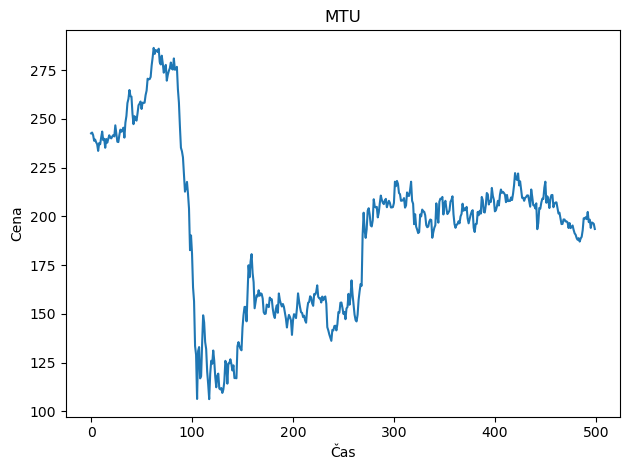

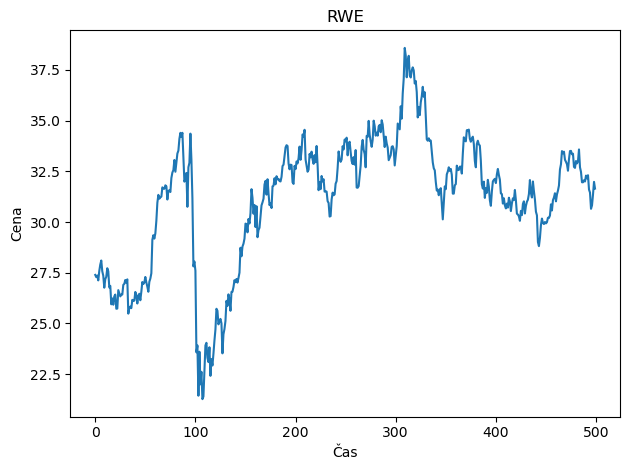

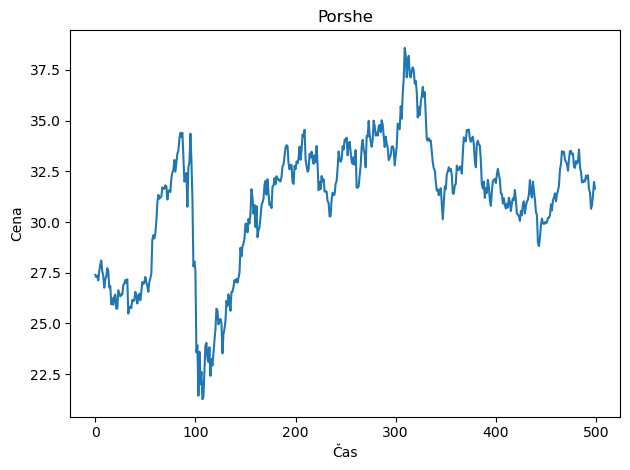

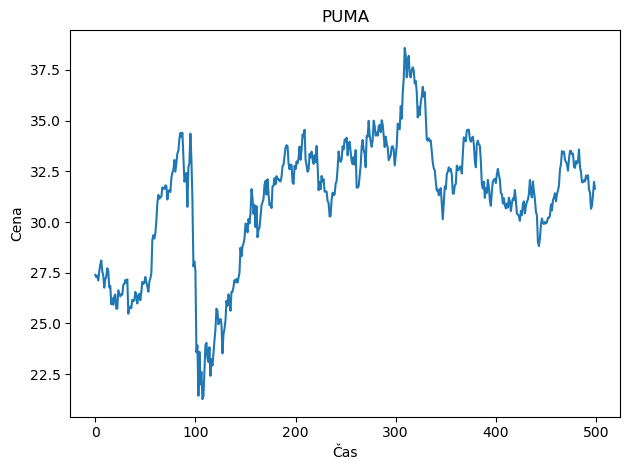

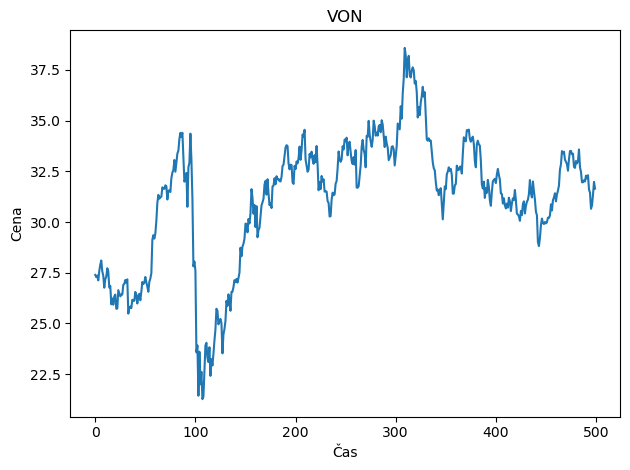

In [28]:
tisk.tisk_grafu(data1, "MTU", ["Čas", "Cena"], "/home/iris/Projekt/portfolio_2/MTU")
tisk.tisk_grafu(data2, "RWE", ["Čas", "Cena"], "/home/iris/Projekt/portfolio_2/RWE")
tisk.tisk_grafu(data2, "Porshe", ["Čas", "Cena"], "/home/iris/Projekt/portfolio_2/PORSHE")
tisk.tisk_grafu(data2, "PUMA", ["Čas", "Cena"], "/home/iris/Projekt/portfolio_2/PUMA")
tisk.tisk_grafu(data2, "VON", ["Čas", "Cena"], "/home/iris/Projekt/portfolio_2/VON")

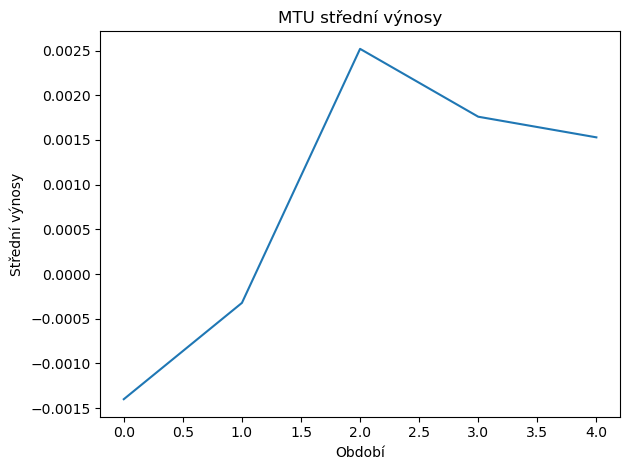

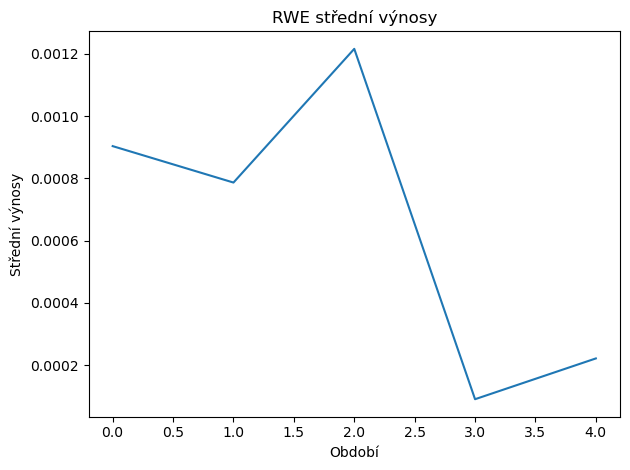

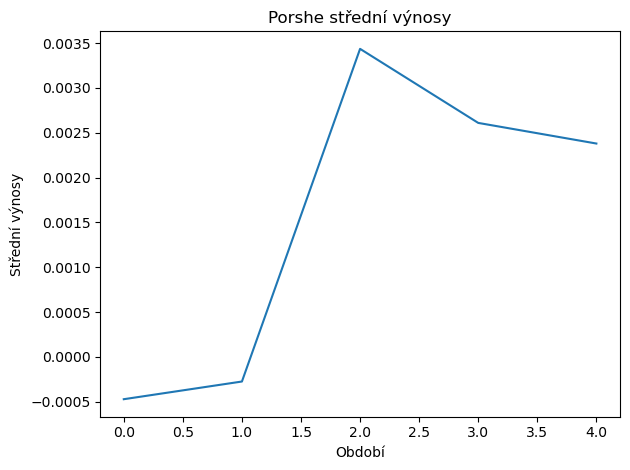

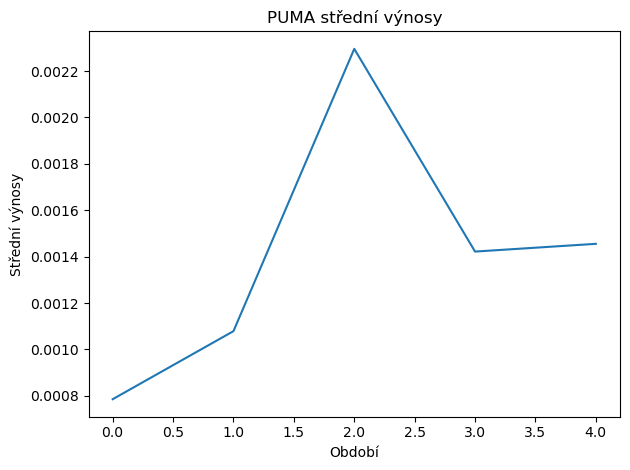

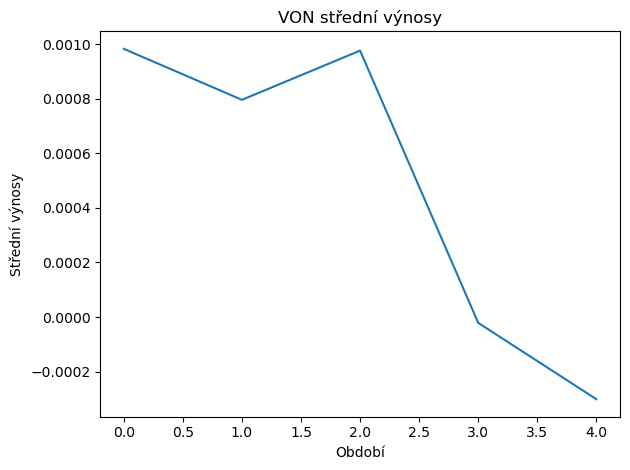

In [29]:
tisk.tisk_grafu(stv1, "MTU střední výnosy", ["Období", "Střední výnosy"], "/home/iris/Projekt/portfolio_2/MTU")
tisk.tisk_grafu(stv2, "RWE střední výnosy", ["Období", "Střední výnosy"], "/home/iris/Projekt/portfolio_2/RWE")
tisk.tisk_grafu(stv3, "Porshe střední výnosy", ["Období", "Střední výnosy"], "/home/iris/Projekt/portfolio_2/PORSHE")
tisk.tisk_grafu(stv4, "PUMA střední výnosy", ["Období", "Střední výnosy"], "/home/iris/Projekt/portfolio_2/PUMA")
tisk.tisk_grafu(stv5, "VON střední výnosy", ["Období", "Střední výnosy"], "/home/iris/Projekt/portfolio_2/VON")

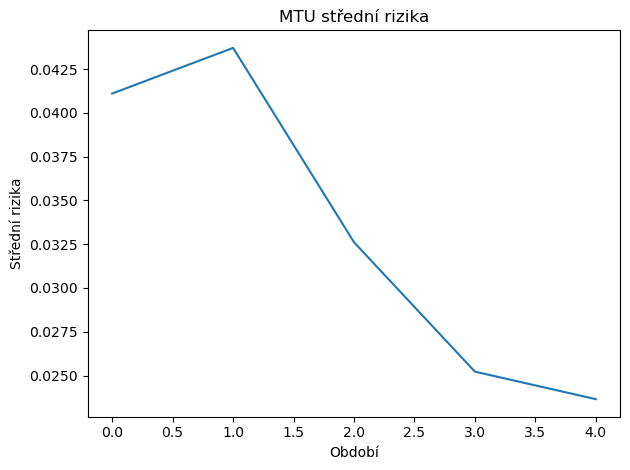

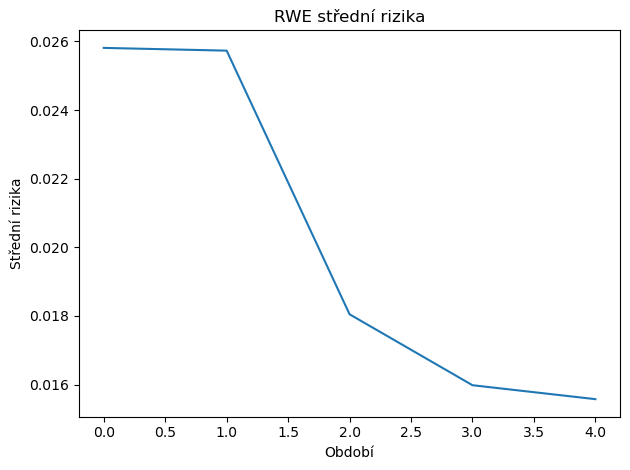

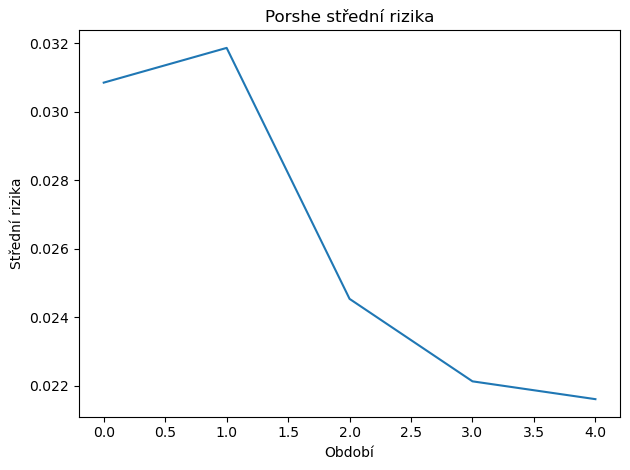

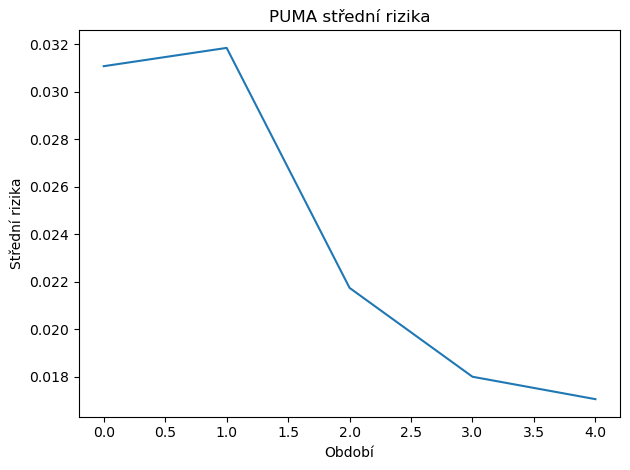

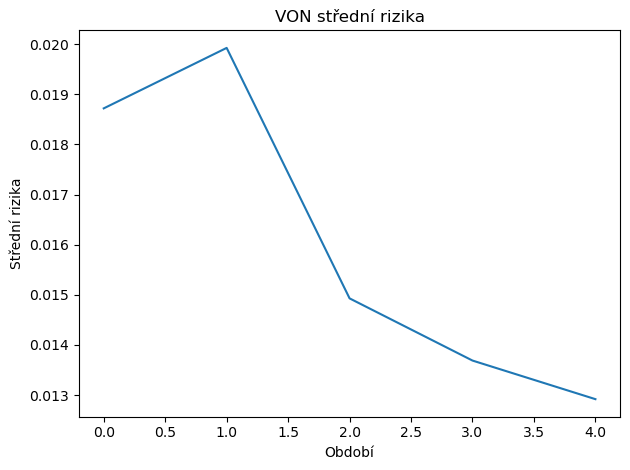

In [30]:
tisk.tisk_grafu(str1, "MTU střední rizika", ["Období", "Střední rizika"], "/home/iris/Projekt/portfolio_2/MTU")
tisk.tisk_grafu(str2, "RWE střední rizika", ["Období", "Střední rizika"], "/home/iris/Projekt/portfolio_2/RWE")
tisk.tisk_grafu(str3, "Porshe střední rizika", ["Období", "Střední rizika"], "/home/iris/Projekt/portfolio_2/PORSHE")
tisk.tisk_grafu(str4, "PUMA střední rizika", ["Období", "Střední rizika"], "/home/iris/Projekt/portfolio_2/PUMA")
tisk.tisk_grafu(str5, "VON střední rizika", ["Období", "Střední rizika"], "/home/iris/Projekt/portfolio_2/VON")

Funcke provádí tisk optimálního rizika jeho příslušného výnosu, rizika při dáném výnosu 7% a výnosy při daném riziku 7%. Data jsou pro přehlednost zpracované  ve formě sloupcových grafů a jsou tisknuty do složky portfolio2.

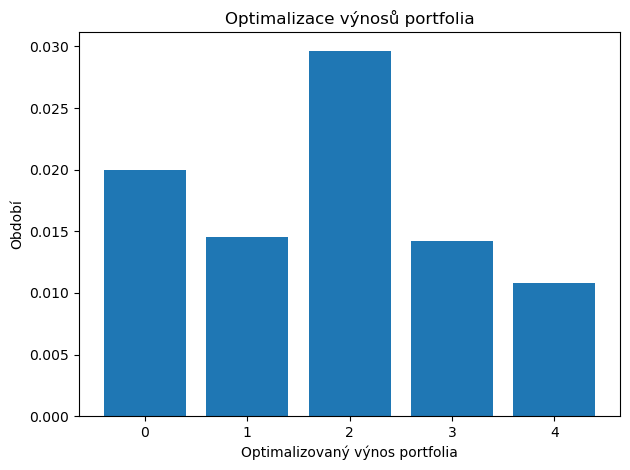

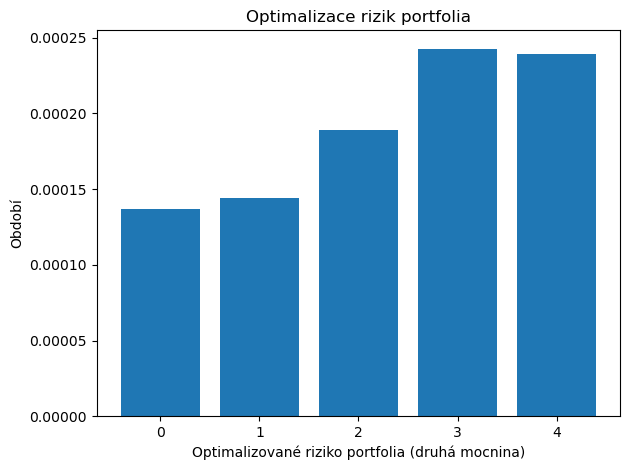

In [31]:
tisk.tisk_grafu_sloupec(optvynos, "Optimalizace výnosů portfolia", ["Optimalizovaný výnos portfolia", "Období"], "/home/iris/Projekt/portfolio_2")
tisk.tisk_grafu_sloupec(optriziko, "Optimalizace rizik portfolia", ["Optimalizované riziko portfolia (druhá mocnina)", "Období"], "/home/iris/Projekt/portfolio_2")

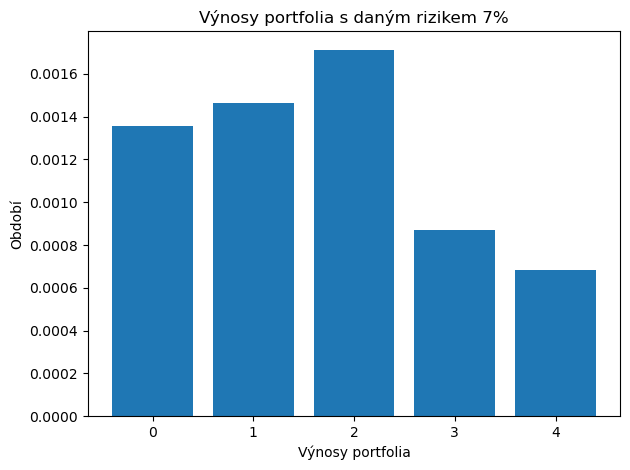

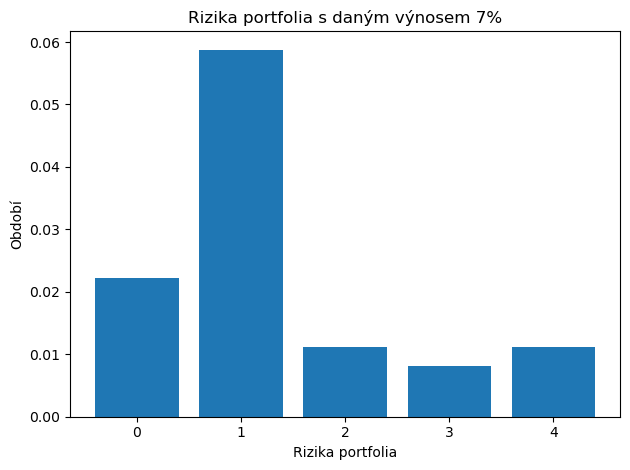

In [32]:
tisk.tisk_grafu_sloupec(vynos, "Výnosy portfolia s daným rizikem 7%", ["Výnosy portfolia", "Období"], "/home/iris/Projekt/portfolio_2")
tisk.tisk_grafu_sloupec(riziko, "Rizika portfolia s daným výnosem 7%", ["Rizika portfolia", "Období"], "/home/iris/Projekt/portfolio_2")